<a href="https://colab.research.google.com/github/Barathram46/Intrusion-Detection-System/blob/main/Helmet_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 28.6 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qkZZnqTh0VibjRxUEs5j")
project = rf.workspace("jayz-workspace").project("helmet-detector-9rzmg")
version = project.version(4)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detector-4 in yolov11:: 100%|██████████| 13228/13228 [00:04<00:00, 3161.67it/s]


In [ ]:
dataset.location

'/content/Helmet-Detector-4'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 104MB/s]
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Helmet-Detector-4/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

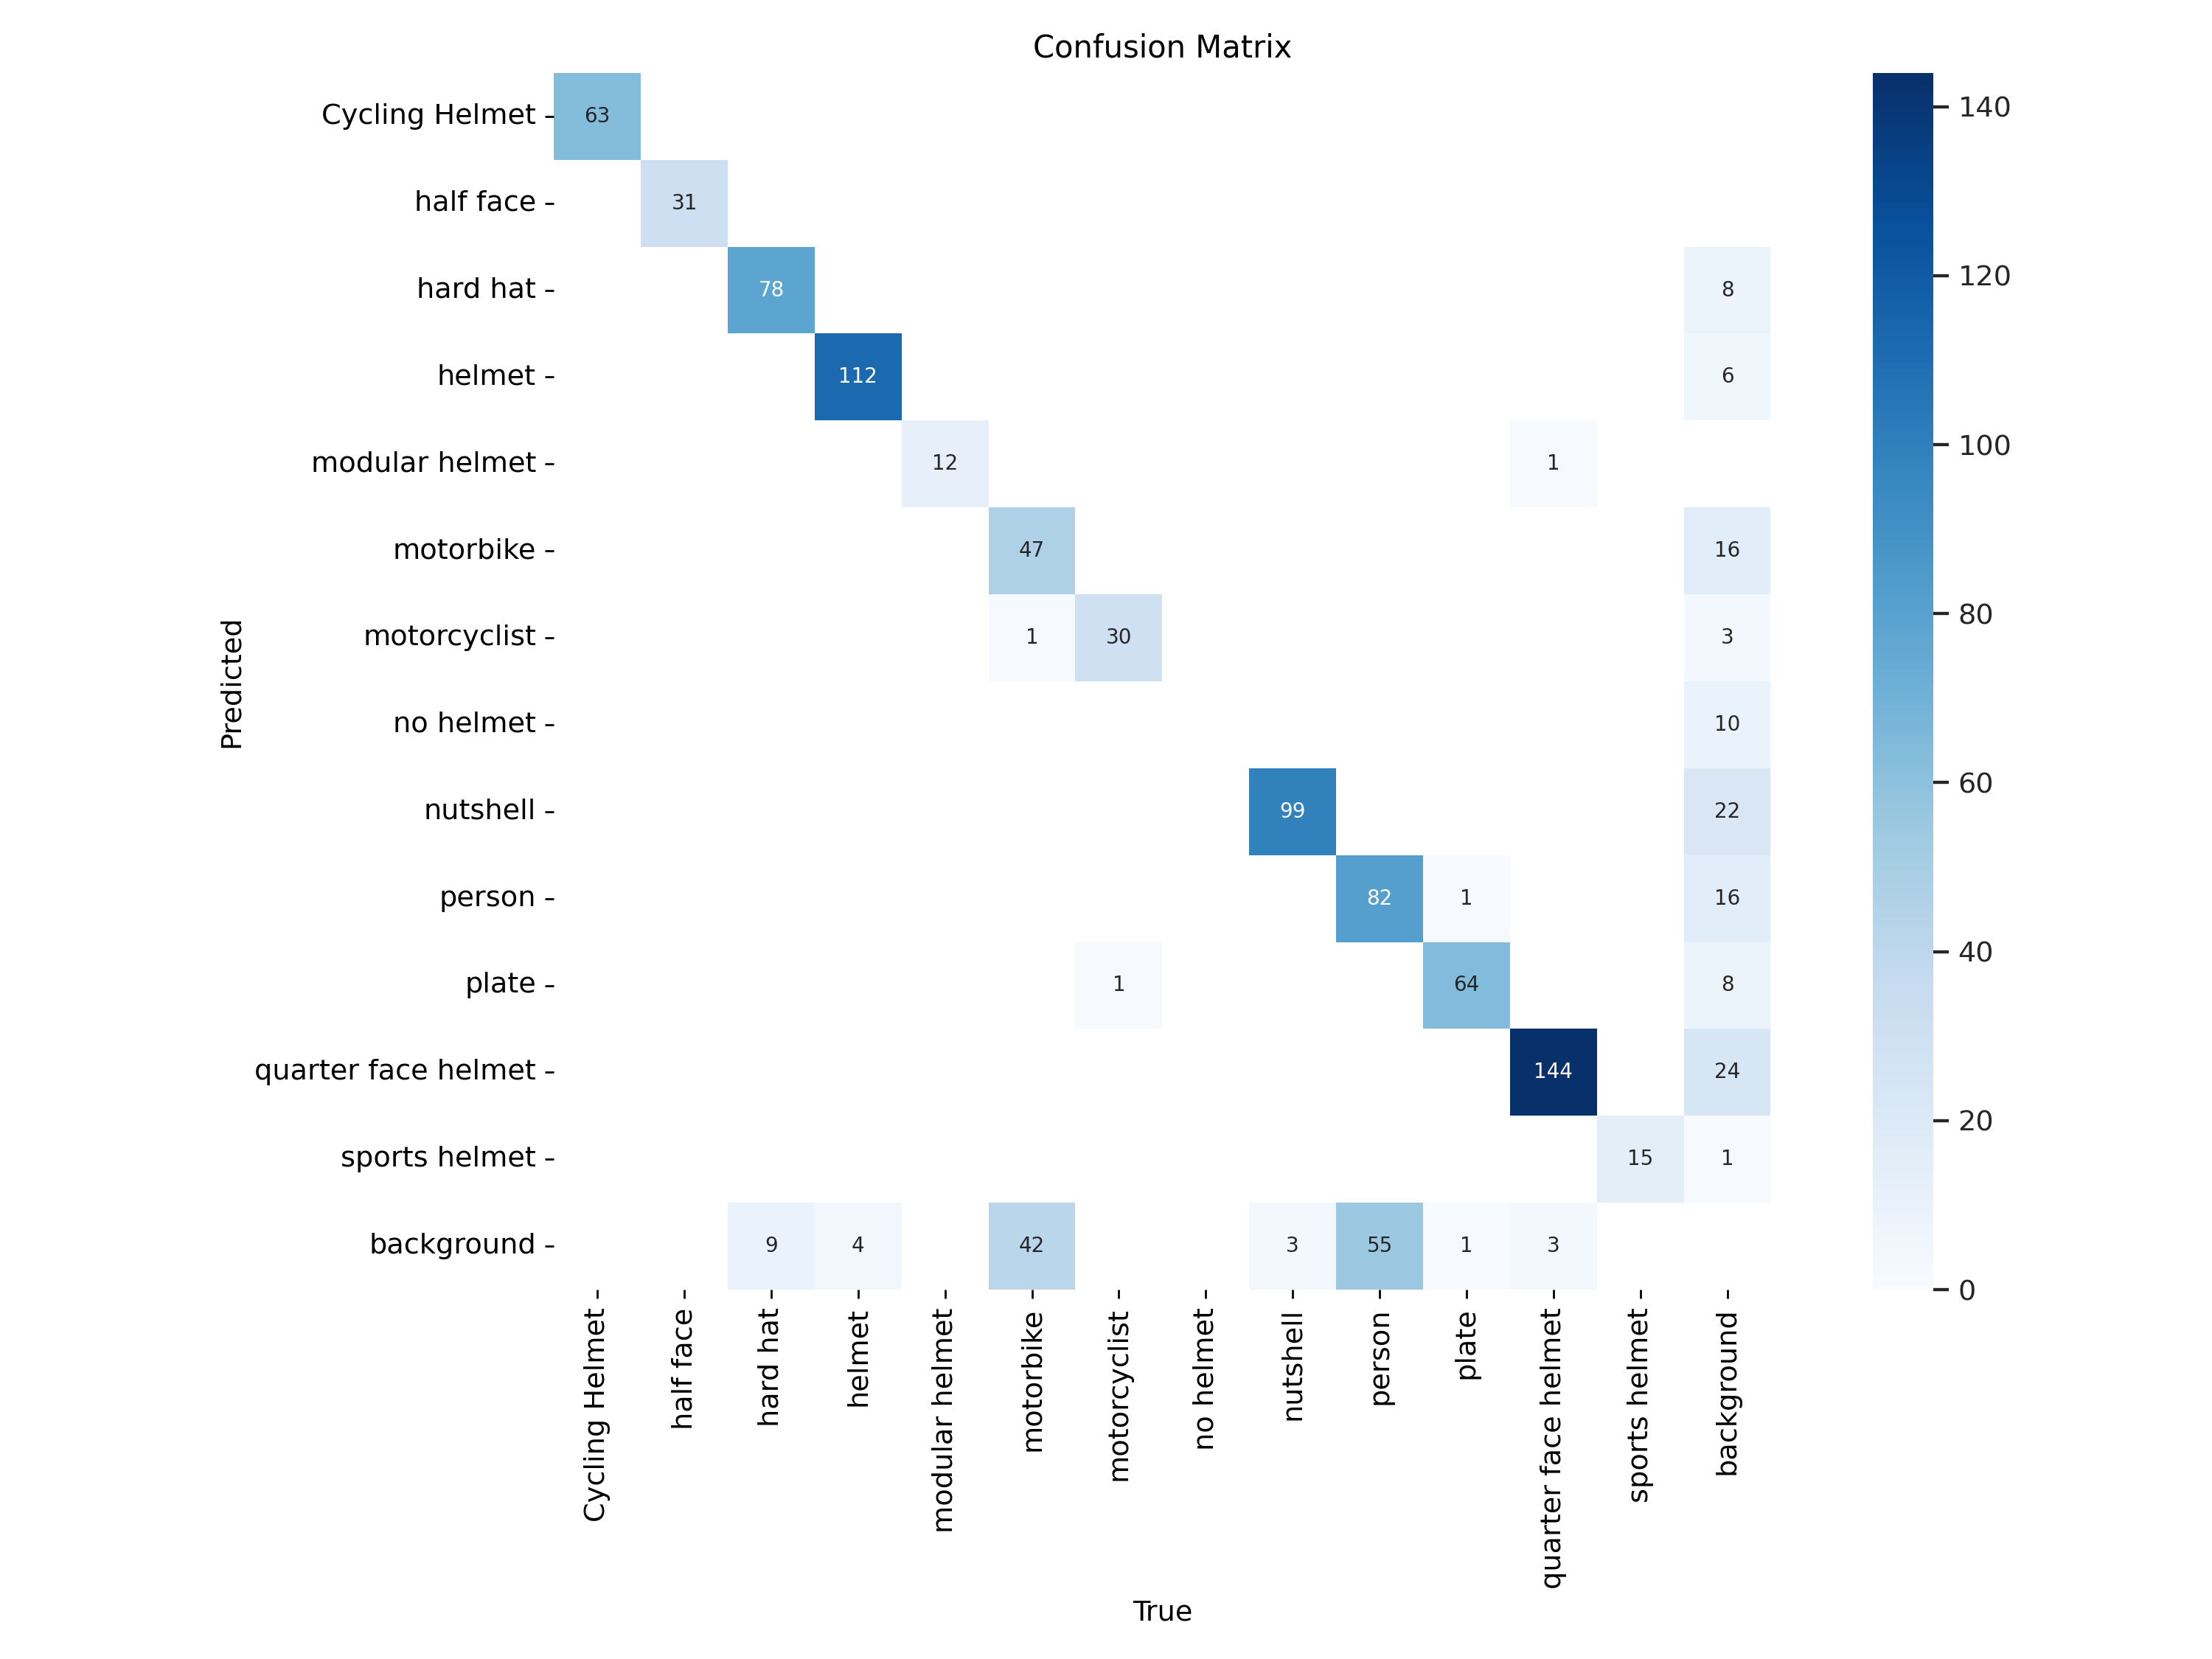

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/388 /content/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.bf848a898612e8ad8c8e9e109fc1f908.jpg: 640x640 1 sports helmet, 29.3ms
image 2/388 /content/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.6fc9af6125bdea4486325dc4fff8c315.jpg: 640x640 1 sports helmet, 42.0ms
image 3/388 /content/Helmet-Detector-4/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.3a8d4caf2715fac8d79efbe05d28f322.jpg: 640x640 1 sports helmet, 29.2ms
image 4/388 /content/Helmet-Detector-4/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-29_jpg.rf.c4121174733d24d59565fc7b89c683b0.jpg: 640x640 1 helmet, 13.2ms
image 5/388 /content/Helmet-Detector-4/test/images/416536556_7209359705787581_7005850060369918163_n_mp4-3_jpg.rf.3d42e8887b9f87cfc7c6fc48d87f

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/download.jpg" save=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/download.jpg: 640x640 1 nutshell, 11.2ms
Speed: 4.0ms preprocess, 11.2ms inference, 555.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


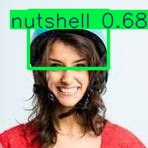

In [ ]:
Image("/content/runs/detect/predict2/download.jpg", width=200)

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/demo.mp4" save=True

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/538) /content/demo.mp4: 384x640 2 persons, 47.7ms
video 1/1 (frame 2/538) /content/demo.mp4: 384x640 2 persons, 8.9ms
video 1/1 (frame 3/538) /content/demo.mp4: 384x640 2 persons, 8.4ms
video 1/1 (frame 4/538) /content/demo.mp4: 384x640 2 persons, 8.4ms
video 1/1 (frame 5/538) /content/demo.mp4: 384x640 1 person, 8.9ms
video 1/1 (frame 6/538) /content/demo.mp4: 384x640 (no detections), 8.2ms
video 1/1 (frame 7/538) /content/demo.mp4: 384x640 (no detections), 10.0ms
video 1/1 (frame 8/538) /content/demo.mp4: 384x640 1 person, 8.3ms
video 1/1 (frame 9/538) /content/demo.mp4: 384x640 1 person, 8.3ms
video 1/1 (frame 10/538) /content/demo.mp4: 384x640 1 person, 8.5ms
video 1/1 (frame 11/538) /content/demo.mp4: 384x640 2 persons, 8.5ms
video 1/1 (frame 12/538) /content/demo.mp4: 384x640 2 persons, 11.9ms
vide

In [ ]:
!sudo apt update
!sudo apt install ffmpeg


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,172 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,508 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,223 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/

In [ ]:
# Replace 'input.avi' with the name of your uploaded AVI file
!ffmpeg -i '/content/runs/detect/predict3/demo.avi' -vcodec libx264 -crf 28 output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

# Path to the video file
video_path = '/content/output.mp4'  # Replace with the uploaded video filename

# Encode video to base64
with open(video_path, 'rb') as video_file:
    video_data = video_file.read()
    video_base64 = b64encode(video_data).decode()

# Display the video
HTML(f'''
<video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
</video>
''')


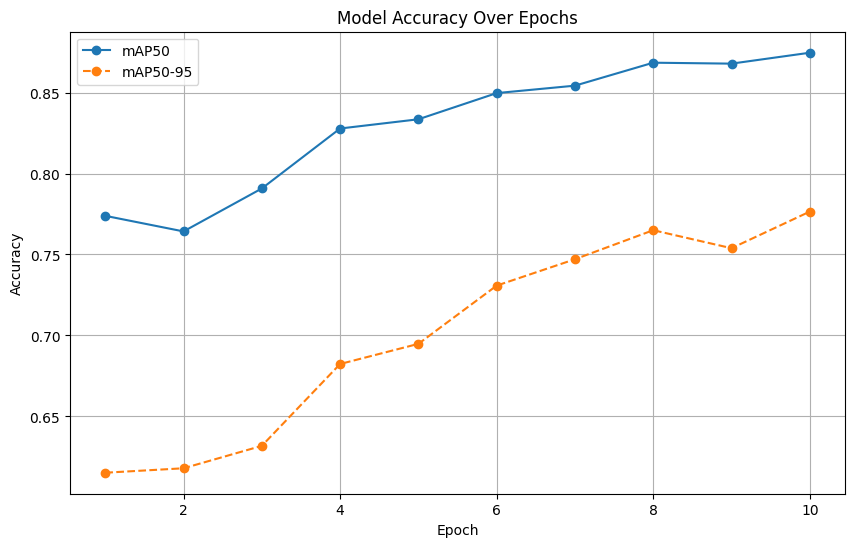

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the data
data = [
    {"epoch":"1","metrics/mAP50(B)":"0.77387","metrics/mAP50-95(B)":"0.61523"},
    {"epoch":"2","metrics/mAP50(B)":"0.76424","metrics/mAP50-95(B)":"0.61798"},
    {"epoch":"3","metrics/mAP50(B)":"0.79076","metrics/mAP50-95(B)":"0.63182"},
    {"epoch":"4","metrics/mAP50(B)":"0.82779","metrics/mAP50-95(B)":"0.68237"},
    {"epoch":"5","metrics/mAP50(B)":"0.83349","metrics/mAP50-95(B)":"0.69481"},
    {"epoch":"6","metrics/mAP50(B)":"0.84966","metrics/mAP50-95(B)":"0.73077"},
    {"epoch":"7","metrics/mAP50(B)":"0.85425","metrics/mAP50-95(B)":"0.74707"},
    {"epoch":"8","metrics/mAP50(B)":"0.86843","metrics/mAP50-95(B)":"0.76499"},
    {"epoch":"9","metrics/mAP50(B)":"0.86785","metrics/mAP50-95(B)":"0.75387"},
    {"epoch":"10","metrics/mAP50(B)":"0.87459","metrics/mAP50-95(B)":"0.77648"},
    # Add more epochs here
]

# Extract epochs and accuracy metrics
epochs = [int(item["epoch"]) for item in data]
map50 = [float(item["metrics/mAP50(B)"]) for item in data]
map50_95 = [float(item["metrics/mAP50-95(B)"]) for item in data]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(epochs, map50, label="mAP50", marker='o', linestyle='-')
plt.plot(epochs, map50_95, label="mAP50-95", marker='o', linestyle='--')

# Add labels, title, and legend
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


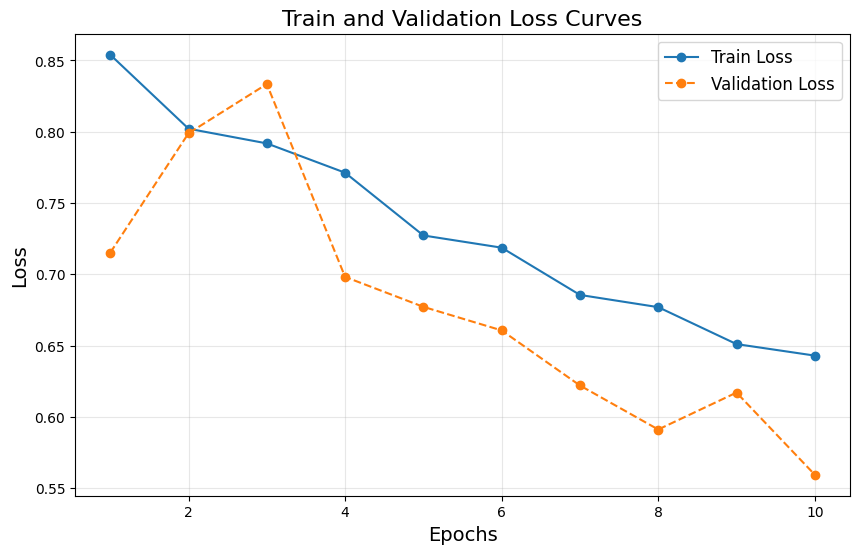

In [ ]:
import json
import matplotlib.pyplot as plt

# Data (Replace this JSON string with your dataset if saved in a file)
data = [
    {"epoch": "1", "train/box_loss": "0.85405", "val/box_loss": "0.71517"},
    {"epoch": "2", "train/box_loss": "0.80214", "val/box_loss": "0.79898"},
    {"epoch": "3", "train/box_loss": "0.79185", "val/box_loss": "0.83348"},
    {"epoch": "4", "train/box_loss": "0.77128", "val/box_loss": "0.6982"},
    {"epoch": "5", "train/box_loss": "0.72727", "val/box_loss": "0.6772"},
    {"epoch": "6", "train/box_loss": "0.7187", "val/box_loss": "0.66066"},
    {"epoch": "7", "train/box_loss": "0.68555", "val/box_loss": "0.62203"},
    {"epoch": "8", "train/box_loss": "0.67698", "val/box_loss": "0.59116"},
    {"epoch": "9", "train/box_loss": "0.65107", "val/box_loss": "0.61707"},
    {"epoch": "10", "train/box_loss": "0.64299", "val/box_loss": "0.55944"}
]

# Parse the data
epochs = [int(d["epoch"]) for d in data]
train_loss = [float(d["train/box_loss"]) for d in data]
val_loss = [float(d["val/box_loss"]) for d in data]

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label="Train Loss", marker="o", linestyle="-")
plt.plot(epochs, val_loss, label="Validation Loss", marker="o", linestyle="--")

# Add labels and title
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Train and Validation Loss Curves", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()
